## Домашнее задание №7

##### Автор: [Радослав Нейчев](https://www.linkedin.com/in/radoslav-neychev/), @neychev

In [1]:
import numpy as np

import torch
from torch import nn
from torch.nn import functional as F

import torchvision
from torchvision.datasets import MNIST

from matplotlib import pyplot as plt
from IPython.display import clear_output

/Users/fortune/miniconda3/envs/hs-ml/lib/python3.10/site-packages/torchvision/io/image.py:13: UserWarning: Failed to load image Python extension: 'dlopen(/Users/fortune/miniconda3/envs/hs-ml/lib/python3.10/site-packages/torchvision/image.so, 0x0006): Symbol not found: __ZN3c1017RegisterOperatorsD1Ev
  Referenced from: <5AA8DD3D-A2CC-31CA-8060-88B4E9C18B09> /Users/fortune/miniconda3/envs/hs-ml/lib/python3.10/site-packages/torchvision/image.so
  Expected in:     <E459C462-F863-3A5A-AC9F-FD77B14BE845> /Users/fortune/miniconda3/envs/hs-ml/lib/python3.10/site-packages/torch/lib/libtorch_cpu.dylib'If you don't plan on using image functionality from `torchvision.io`, you can ignore this warning. Otherwise, there might be something wrong with your environment. Did you have `libjpeg` or `libpng` installed before building `torchvision` from source?
  warn(


### Task #1: 
Let's turn to the classic problem of handwritten digit recognition. We will be working with the [MNIST](http://yann.lecun.com/exdb/mnist/) dataset. In this task, we will use the entire dataset as a whole.

__Your main task is to implement the entire model training pipeline and achieve an accuracy of $\geq 92\%$ on the test set.__

The code for training the model is missing in this task. There are only a few tests that will help you debug your solution. For an example, you can refer to the notebook from the first lesson.

We strongly recommend writing the code "from scratch," only glancing at ready-made examples, rather than just "copy-pasting". This will help you in the future.

/Users/fortune/miniconda3/envs/hs-ml/lib/python3.10/site-packages/torchvision/io/image.py:13: UserWarning: Failed to load image Python extension: 'dlopen(/Users/fortune/miniconda3/envs/hs-ml/lib/python3.10/site-packages/torchvision/image.so, 0x0006): Symbol not found: __ZN3c1017RegisterOperatorsD1Ev
  Referenced from: <5AA8DD3D-A2CC-31CA-8060-88B4E9C18B09> /Users/fortune/miniconda3/envs/hs-ml/lib/python3.10/site-packages/torchvision/image.so
  Expected in:     <E459C462-F863-3A5A-AC9F-FD77B14BE845> /Users/fortune/miniconda3/envs/hs-ml/lib/python3.10/site-packages/torch/lib/libtorch_cpu.dylib'If you don't plan on using image functionality from `torchvision.io`, you can ignore this warning. Otherwise, there might be something wrong with your environment. Did you have `libjpeg` or `libpng` installed before building `torchvision` from source?
  warn(
/Users/fortune/miniconda3/envs/hs-ml/lib/python3.10/site-packages/torchvision/io/image.py:13: UserWarning: Failed to load image Python extens

Text(0.5, 1.0, 'Image label: 9')

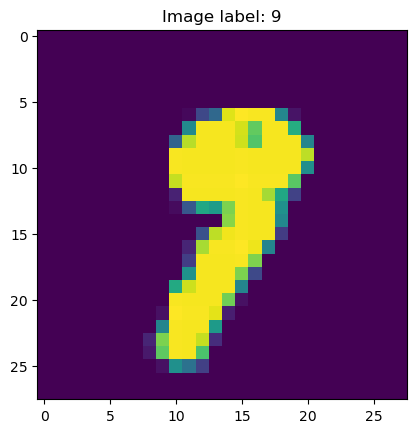

In [33]:
# do not change the code in the block below
# __________start of block__________

train_mnist_data = MNIST('.', train=True, transform=torchvision.transforms.ToTensor(), download=True)
test_mnist_data = MNIST('.', train=False, transform=torchvision.transforms.ToTensor(), download=True)

train_data_loader = torch.utils.data.DataLoader(
    train_mnist_data,
    batch_size=32,
    shuffle=True,
    num_workers=2
)

test_data_loader = torch.utils.data.DataLoader(
    test_mnist_data,
    batch_size=32,
    shuffle=False,
    num_workers=2
)

random_batch = next(iter(train_data_loader))
_image, _label = random_batch[0][0], random_batch[1][0]
plt.figure()
plt.imshow(_image.reshape(28, 28))
plt.title(f'Image label: {_label}')
# __________end of block__________

Build the model below. Please do not construct an overly complicated network; it should not be deeper than four layers (it can be less). Your main task is to train the model and achieve at least 92% accuracy on the test set (hold-out set).

*Note: Linear layers and activation functions should suffice.*

__Keep in mind, your model should be represented by the variable `model`__

In [68]:
# Creating model instance
model = nn.Sequential(
    nn.Flatten(),
    nn.Linear(28 * 28, 100),
    nn.ReLU(),
    nn.Linear(100, 10)
)

Local tests for checking your model are available below:

In [51]:
# do not change the code in the block below
# __________start of block__________
assert model is not None, 'Please, use `model` variable to store your model'

try:
    x = random_batch[0].reshape(-1, 784)
    y = random_batch[1]

    # compute outputs given inputs, both are variables
    y_predicted = model(x)    
except Exception as e:
    print('Something is wrong with the model')
    raise e
    
    
assert y_predicted.shape[-1] == 10, 'Model should predict 10 logits/probas'

print('Everything seems fine!')
# __________end of block__________

Everything seems fine!


Configure your model's parameters on the training set. We recommend experimenting with different optimizers.

In [69]:
device = torch.device("cuda") if torch.cuda.is_available() else torch.device("cpu")
print(f"Training on {device}")
model.to(device, dtype=torch.float32)
opt = torch.optim.Adam(model.parameters(), lr=0.001)
loss_function = nn.CrossEntropyLoss()

train_size = 80
test_size = 20
epochs = 10

Training on cpu


In [70]:
def train_model(model, opt, train_data_loader, test_data_loader, loss_function, train_size, test_size):
    train_loss = []
    test_loss = []
    test_accuracy = []

    for epoch in range(epochs):
        epoch_train_loss = []
        epoch_test_loss = []
        epoch_test_accuracy = []
        train_batch_idx = 0
        test_batch_idx = 0

        model.train(True)
        for x_batch, y_batch in train_data_loader:
            if train_batch_idx > train_size:
                break
            train_batch_idx += 1
            x_batch = x_batch.to(device, dtype=torch.float32)
            y_batch = y_batch.to(device, dtype=torch.long)

            pred = model(x_batch)
            loss = loss_function(pred, y_batch)

            opt.zero_grad()
            loss.backward()

            opt.step()
            epoch_train_loss.append(loss.item())

        model.eval()
        with torch.no_grad():
            for x_batch, y_batch in test_data_loader:
                if test_batch_idx > test_size:
                    break
                test_batch_idx += 1
                x_batch = x_batch.to(device, dtype=torch.float32)
                y_batch = y_batch.to(device, dtype=torch.long)

                pred = model(x_batch)
                loss = loss_function(pred, y_batch)

                epoch_test_loss.append(loss.item())
                y_pred = pred.argmax(dim=1)
                epoch_test_accuracy.append((y_pred == y_batch).float().mean().item())

        print(f'Epoch {epoch + 1} of {epochs}')
        train_loss.append(np.mean(epoch_train_loss))
        test_loss.append(np.mean(epoch_test_loss))
        test_accuracy.append(np.mean(epoch_test_accuracy))

        print(f'Train loss: {train_loss[-1]}')
        print(f'Test loss: {test_loss[-1]}')
        print(f'Test accuracy: {test_accuracy[-1]}')

        clear_output(True)
        plt.plot(train_loss, label='train')
        plt.plot(test_loss, label='test')
        plt.legend()
        plt.show()
    return train_loss, test_loss, test_accuracy

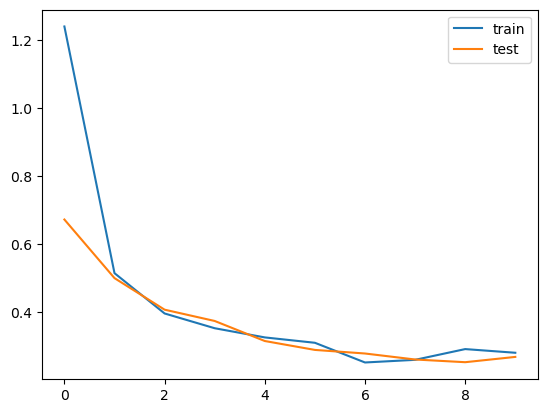

In [71]:
out = train_model(model, opt, train_data_loader, test_data_loader, loss_function, train_size, test_size)

Also, remember that you can always refer to the excellent [documentation](https://pytorch.org/docs/stable/index.html) and [tutorials](https://pytorch.org/tutorials/).

Let's evaluate the classification quality:

In [72]:
predicted_labels = []
real_labels = []
model.eval()
with torch.no_grad():
    for batch in train_data_loader:
        y_predicted = model(batch[0].reshape(-1, 784))
        predicted_labels.append(y_predicted.argmax(dim=1))
        real_labels.append(batch[1])

predicted_labels = torch.cat(predicted_labels)
real_labels = torch.cat(real_labels)
train_acc = (predicted_labels == real_labels).type(torch.FloatTensor).mean()

/Users/fortune/miniconda3/envs/hs-ml/lib/python3.10/site-packages/torchvision/io/image.py:13: UserWarning: Failed to load image Python extension: 'dlopen(/Users/fortune/miniconda3/envs/hs-ml/lib/python3.10/site-packages/torchvision/image.so, 0x0006): Symbol not found: __ZN3c1017RegisterOperatorsD1Ev
  Referenced from: <5AA8DD3D-A2CC-31CA-8060-88B4E9C18B09> /Users/fortune/miniconda3/envs/hs-ml/lib/python3.10/site-packages/torchvision/image.so
  Expected in:     <E459C462-F863-3A5A-AC9F-FD77B14BE845> /Users/fortune/miniconda3/envs/hs-ml/lib/python3.10/site-packages/torch/lib/libtorch_cpu.dylib'If you don't plan on using image functionality from `torchvision.io`, you can ignore this warning. Otherwise, there might be something wrong with your environment. Did you have `libjpeg` or `libpng` installed before building `torchvision` from source?
  warn(
/Users/fortune/miniconda3/envs/hs-ml/lib/python3.10/site-packages/torchvision/io/image.py:13: UserWarning: Failed to load image Python extens

In [73]:
print(f'Neural network accuracy on train set: {train_acc:3.5}')

Neural network accuracy on train set: 0.92327


In [74]:
predicted_labels = []
real_labels = []
model.eval()
with torch.no_grad():
    for batch in test_data_loader:
        y_predicted = model(batch[0].reshape(-1, 784))
        predicted_labels.append(y_predicted.argmax(dim=1))
        real_labels.append(batch[1])

predicted_labels = torch.cat(predicted_labels)
real_labels = torch.cat(real_labels)
test_acc = (predicted_labels == real_labels).type(torch.FloatTensor).mean()

/Users/fortune/miniconda3/envs/hs-ml/lib/python3.10/site-packages/torchvision/io/image.py:13: UserWarning: Failed to load image Python extension: 'dlopen(/Users/fortune/miniconda3/envs/hs-ml/lib/python3.10/site-packages/torchvision/image.so, 0x0006): Symbol not found: __ZN3c1017RegisterOperatorsD1Ev
  Referenced from: <5AA8DD3D-A2CC-31CA-8060-88B4E9C18B09> /Users/fortune/miniconda3/envs/hs-ml/lib/python3.10/site-packages/torchvision/image.so
  Expected in:     <E459C462-F863-3A5A-AC9F-FD77B14BE845> /Users/fortune/miniconda3/envs/hs-ml/lib/python3.10/site-packages/torch/lib/libtorch_cpu.dylib'If you don't plan on using image functionality from `torchvision.io`, you can ignore this warning. Otherwise, there might be something wrong with your environment. Did you have `libjpeg` or `libpng` installed before building `torchvision` from source?
  warn(
/Users/fortune/miniconda3/envs/hs-ml/lib/python3.10/site-packages/torchvision/io/image.py:13: UserWarning: Failed to load image Python extens

In [75]:
print(f'Neural network accuracy on test set: {test_acc:3.5}')

Neural network accuracy on test set: 0.9228


Check that the necessary thresholds are passed:

In [76]:
assert test_acc >= 0.92, 'Test accuracy is below 0.92 threshold'
assert train_acc >= 0.91, 'Train accuracy is below 0.91 while test accuracy is fine. We recommend to check your model and data flow'

### Submitting the Assignment
Upload the file `hw07_data_dict.npy` (link is on the assignment page) and run the code below to generate your submission.

In [77]:
# do not change the code in the block below
# __________start of block__________
import os
import json
assert os.path.exists('hw07_data_dict.npy'), 'Please, download `hw07_data_dict.npy` and place it in the working directory'

def get_predictions(model, eval_data, step=10):
    
    predicted_labels = []
    model.eval()
    with torch.no_grad():
        for idx in range(0, len(eval_data), step):
            y_predicted = model(eval_data[idx:idx+step].reshape(-1, 784))
            predicted_labels.append(y_predicted.argmax(dim=1))
    
    predicted_labels = torch.cat(predicted_labels).numpy()
    predicted_labels = ','.join([str(x) for x in list(predicted_labels)])
    return predicted_labels

loaded_data_dict = np.load('hw07_data_dict.npy', allow_pickle=True)

submission_dict = {
    'train': get_predictions(model, torch.FloatTensor(loaded_data_dict.item()['train'])),
    'test': get_predictions(model, torch.FloatTensor(loaded_data_dict.item()['test']))
}

with open('submission_dict_hw07.json', 'w') as iofile:
    json.dump(submission_dict, iofile)
print('File saved to `submission_dict_hw07.json`')
# __________end of block__________

File saved to `submission_dict_hw07.json`


In [79]:
get_predictions(model, torch.FloatTensor(loaded_data_dict.item()['test']))

'7,2,1,0,4,1,4,9,6,9,0,6,9,0,1,5,9,7,3,4,7,6,6,5,4,0,7,4,0,1,3,1,3,4,7,2,7,1,2,1,1,7,4,2,3,5,1,2,4,4,6,3,5,5,6,0,4,1,9,5,7,8,4,3,7,4,6,4,3,0,7,0,2,7,1,7,3,2,9,7,7,6,2,7,8,4,7,3,6,1,3,6,4,3,1,4,1,7,6,9,6,0,5,4,9,9,2,1,9,4,8,7,3,9,7,4,4,4,9,2,5,4,7,6,4,9,0,5,8,5,6,6,5,7,8,1,0,1,6,4,6,7,3,1,7,1,8,2,0,9,9,2,5,5,1,5,6,0,3,4,4,6,5,4,6,5,4,5,1,4,4,7,2,3,2,7,1,8,1,8,1,8,5,0,8,9,2,5,0,1,1,1,0,3,0,3,1,6,4,2,3,6,1,1,1,3,9,5,2,9,4,7,9,3,9,0,3,6,5,5,7,2,2,7,1,2,8,4,1,7,3,3,8,7,7,9,2,2,4,1,5,8,8,7,2,3,0,2,4,2,4,1,9,5,7,7,2,8,2,0,8,5,7,7,3,1,8,1,8,0,3,0,1,9,9,4,1,8,2,1,2,9,7,5,9,2,6,4,1,5,4,2,9,2,0,4,0,0,2,8,6,7,1,2,4,0,2,7,4,3,3,0,0,5,1,9,6,5,2,5,7,7,9,3,0,4,2,0,7,1,1,2,1,5,3,3,9,7,8,6,3,6,1,3,8,1,0,5,1,3,1,5,0,6,1,8,5,1,7,4,4,6,7,2,5,0,6,5,6,3,7,2,0,8,8,5,4,1,1,4,0,7,3,7,6,1,6,2,1,7,2,8,6,1,9,5,2,5,4,4,2,8,3,8,2,4,5,0,3,1,7,7,3,7,9,7,1,7,2,1,4,2,9,2,0,4,9,1,4,8,1,8,4,5,9,7,8,3,7,6,0,0,3,0,2,0,6,4,3,5,3,3,2,3,9,1,2,6,8,0,5,6,6,6,3,8,8,2,2,5,8,9,6,1,8,4,1,2,5,3,1,9,7,5,4,0,8,9,9,1,0,5,2,3,7,2,9,4,0,6

With that, the task is complete. Congratulations!